# **Churn Overview**

Churn refers to the rate at which customers stop doing business with a company. In this analysis, we look at whether customers have **churned (1)** or **stayed (0)** with the company. Understanding churn is critical for businesses because:

1. **Customer Retention**: High churn rates indicate a loss of customers, which directly affects revenue. Identifying churn patterns helps businesses focus on improving retention strategies.
   
2. **Cost Efficiency**: Acquiring new customers is more expensive than retaining existing ones. Reducing churn helps optimize marketing and customer support costs.

3. **Business Growth**: By understanding why customers leave, companies can make informed decisions to improve products or services, leading to better customer satisfaction and long-term growth.

Reducing churn is necessary to maintain a healthy customer base and ensure the company’s financial stability and growth.


# **Importing Libraries and Loading Data**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler,RobustScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score  ,ConfusionMatrixDisplay,RocCurveDisplay
from sklearn.metrics import roc_auc_score, roc_curve, confusion_matrix
import warnings
warnings.filterwarnings("ignore")

In [3]:
df = pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")

# **Data Exploration(EDA) and Preprocessing**

In [4]:
# Print first 5 rows
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
# Print last 5 rows
df.tail()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes
7042,3186-AJIEK,Male,0,No,No,66,Yes,No,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.65,6844.5,No


In [6]:
#Checking Datatypes
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [7]:
#Checking shape of data
df.shape

(7043, 21)

### This dataset contains 7043 rows and 21 columns.

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [9]:
# Checking count
df['Churn'].value_counts()

Churn
No     5174
Yes    1869
Name: count, dtype: int64

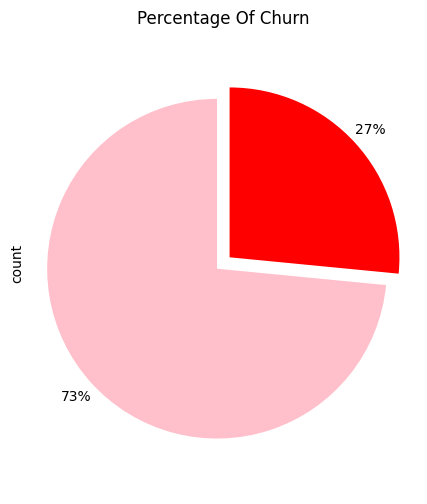

In [13]:
# Pie chart to visualise the percentage of Churn and No Churn.
df['Churn'].value_counts().plot(kind='pie',
                            figsize=(5, 6),
                            autopct='%1.0f%%',
                            startangle=90 ,
                            colors= ['pink', 'red'],
                            explode  = [0.1, 0],
                            labels=None,
                            pctdistance=1.12

                            )
plt.title('Percentage Of Churn')
plt.axis('equal')
plt.show()


### Data seems to be imbalanced as around 73% data is No Churn and 27% is Churn.

In [14]:
#Checking null values in each column
df.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [15]:
# There are spaces in the TotalCharges variable and is of object type
df['TotalCharges'] = df['TotalCharges'].replace(" ", np.nan)

df['TotalCharges'] = df['TotalCharges'].astype('float64')

In [16]:
df.isna().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [17]:
df['TotalCharges'].fillna(df['TotalCharges'].median(), inplace=True)

### Replacing 11 null values with median

In [18]:
df.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [19]:
# Changing the datatype to object
df['SeniorCitizen'] = df['SeniorCitizen'].astype('str')

In [20]:
# Checking again datatypes are ok
df.dtypes

customerID           object
gender               object
SeniorCitizen        object
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

In [21]:
#Summary Statistics
df.describe().T

,count,mean,std,min,25%,50%,75%,max
tenure,7043.0,32.371149,24.559481,0.00,9.000,29.000,55.00,72.00
MonthlyCharges,7043.0,64.761692,30.090047,18.25,35.500,70.350,89.85,118.75
TotalCharges,7043.0,2281.916928,2265.270398,18.80,402.225,1397.475,3786.60,8684.80


**Tenure:** There is a wide spread in the length of time customers stay, with a few very short and long tenures.

**Monthly Charges:** The majority of customers have monthly charges ranging from 35 to 90$.

**Total Charges:** Customers with higher tenures tend to have significantly higher total charges, but the distribution is very broad, with some customers paying much less and others much more.

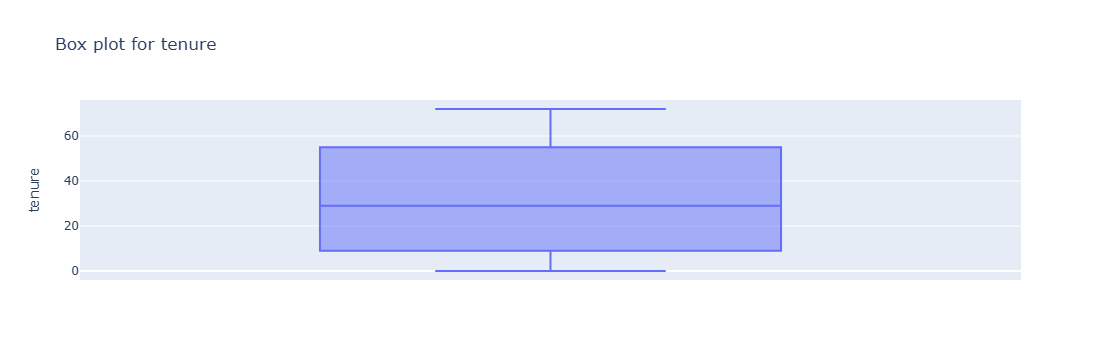

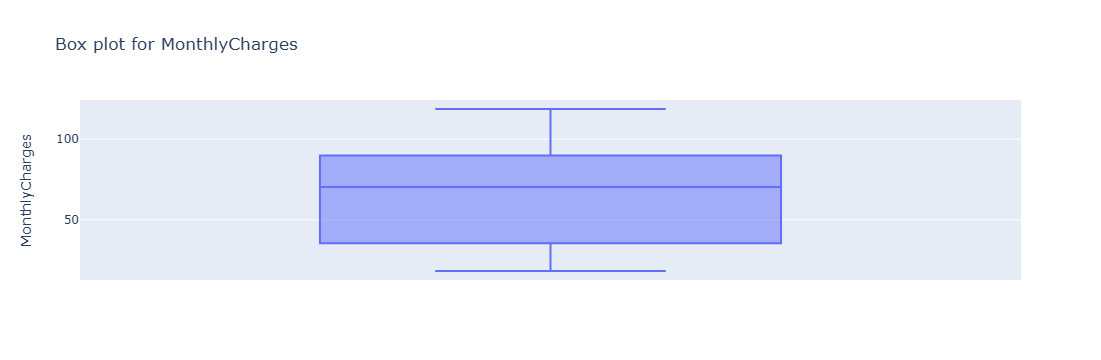

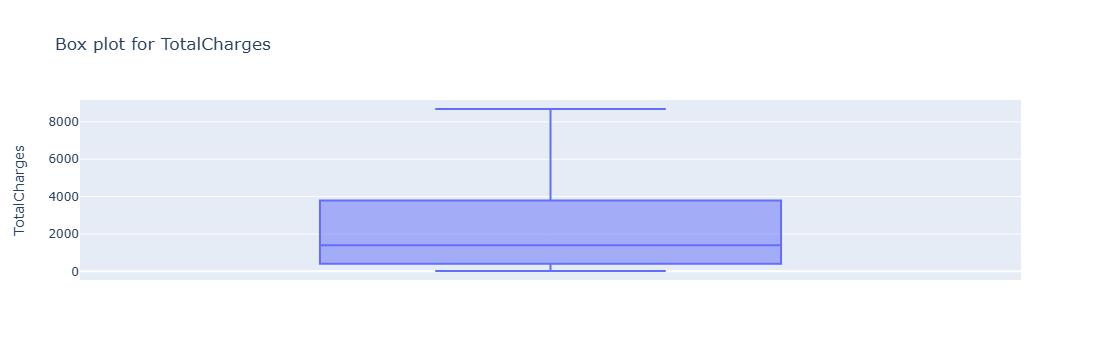

In [23]:
#Checking for outliers from boxplot
import plotly.express as px
for col in df.columns:
    if df[col].dtype in ['float64', 'int64']:
        fig = px.box(df, y=col, title=f'Box plot for {col}')
        fig.show()

### There are no outliers in the dataset

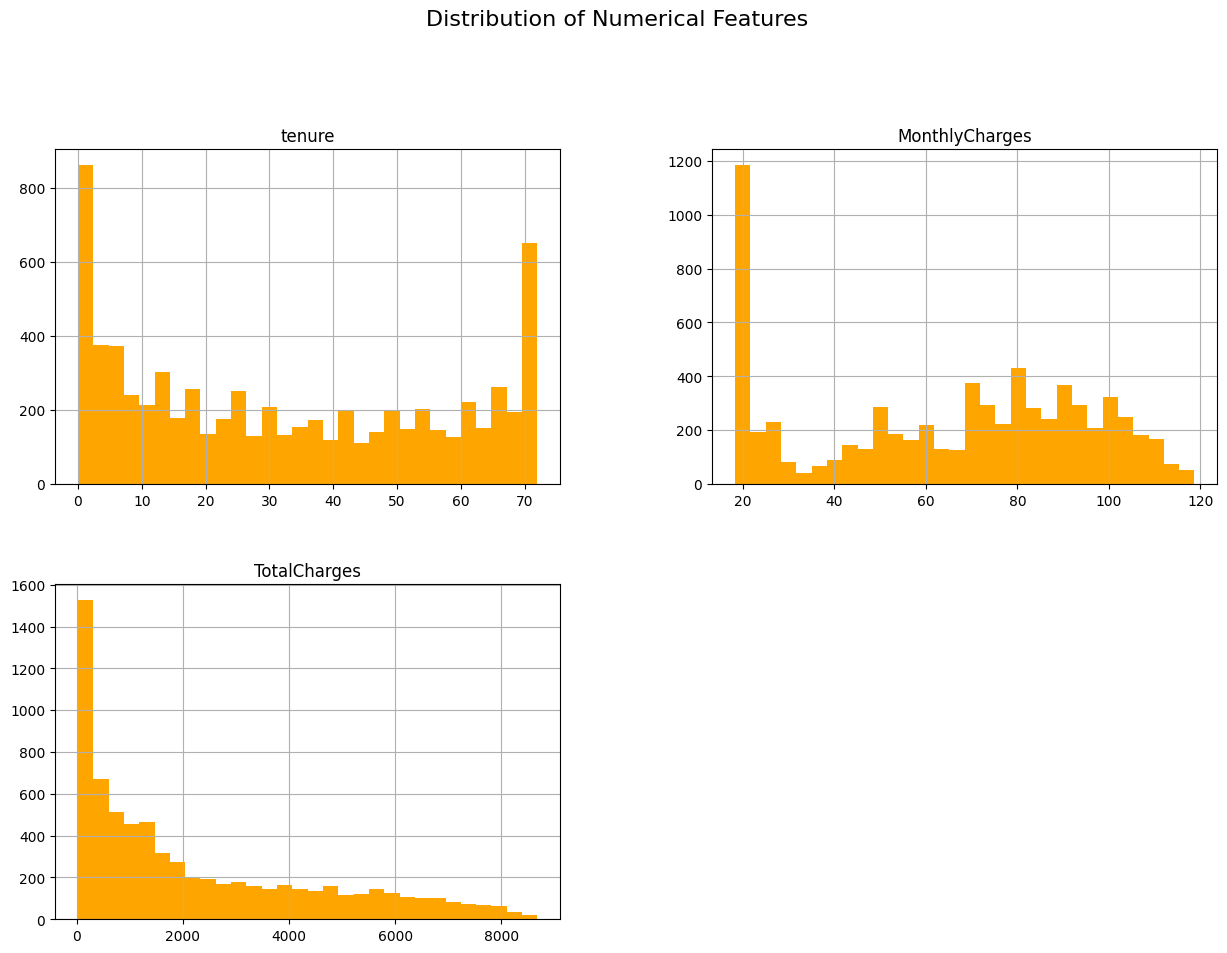

In [21]:
# Visualize distribution of numerical features
numeric_features = df.select_dtypes(include=['float64', 'int64']).columns
df[numeric_features].hist(bins=30, figsize=(15, 10), color='orange')
plt.suptitle("Distribution of Numerical Features", y=1.02, fontsize=16)
plt.show()


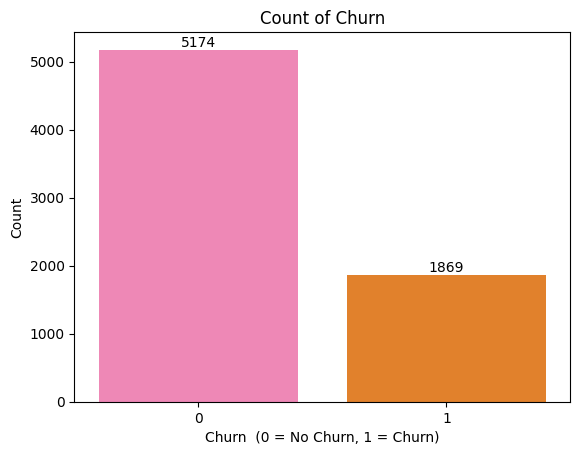

In [65]:
# Countplot to visualize the distribution of churn (0 or 1)
ax=sns.countplot(data= df, x= 'Churn', palette=['#ff77b4', '#ff7f0e'])
for bars in ax.containers:
    ax.bar_label(bars)
plt.xlabel('Churn  (0 = No Churn, 1 = Churn)')
plt.ylabel('Count')
plt.title('Count of Churn')
plt.show()


In [25]:
df.groupby(by=['Churn']).agg({'tenure':'mean', 'MonthlyCharges':'mean'})

,tenure,MonthlyCharges
Churn,,
No,37.569965,61.265124
Yes,17.979133,74.441332


### The average tenure and monthly charges for customers grouped by churn status are:No Churn: Average tenure = 37.57 months, Average monthly charges = 61.27, Churn: Average tenure = 17.98 months, Average monthly charges = 74.44. This indicates that customers who churn tend to have shorter tenures and higher monthly charges.

In [26]:
df.groupby(by=['Churn','gender']).agg({'Churn':'count'})

Churn
Churn gender       
No    Female   2549
      Male     2625
Yes   Female    939
      Male      930

### Customer Count by Churn Status and Gender


- There are slightly more male customers than female customers in both the churn and non-churn categories.


In [28]:
df.groupby(by=['Churn']).agg({'TotalCharges':'sum'}).map('{:,.2f}'.format)

,TotalCharges
Churn,
No,"13,208,614.03"
Yes,"2,862,926.90"


### Total Charges by Churn Status

- Customers who did not churn have accumulated a total of **13,208,614.03** in charges.
- Customers who churned have accumulated **2,862,926.90** in charges.

This indicates a loss of **2,862,926.90** due to customer churn.


 # **Feature Engineering**

In [29]:
# Dropping non relevant columns from the dataset
df.drop(columns=['customerID'], inplace=True)

In [30]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [31]:
df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [32]:
# One-Hot Encoding of Categorical Variables
df = pd.get_dummies(df, columns=['gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod'],drop_first=True)

In [33]:
df.head()

,tenure,MonthlyCharges,TotalCharges,Churn,gender_Male,SeniorCitizen_1,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,29.85,29.85,No,False,False,True,False,False,True,...,False,False,False,False,False,False,True,False,True,False
1,34,56.95,1889.50,No,True,False,False,False,True,False,...,False,False,False,False,True,False,False,False,False,True
2,2,53.85,108.15,Yes,True,False,False,False,True,False,...,False,False,False,False,False,False,True,False,False,True
3,45,42.30,1840.75,No,True,False,False,False,False,True,...,False,False,False,False,True,False,False,False,False,False
4,2,70.70,151.65,Yes,False,False,False,False,True,False,...,False,False,False,False,False,False,True,False,True,False


In [34]:
# Creating new feature for calculating Average Monthly Charges.
df['AvgMonthlyCharges'] = df.apply(lambda x: x['TotalCharges'] / x['tenure'] if x['tenure'] > 0 else 0, axis=1)

In [35]:
df.head()

,tenure,MonthlyCharges,TotalCharges,Churn,gender_Male,SeniorCitizen_1,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,...,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,AvgMonthlyCharges
0,1,29.85,29.85,No,False,False,True,False,False,True,...,False,False,False,False,False,True,False,True,False,29.850000
1,34,56.95,1889.50,No,True,False,False,False,True,False,...,False,False,False,True,False,False,False,False,True,55.573529
2,2,53.85,108.15,Yes,True,False,False,False,True,False,...,False,False,False,False,False,True,False,False,True,54.075000
3,45,42.30,1840.75,No,True,False,False,False,False,True,...,False,False,False,True,False,False,False,False,False,40.905556
4,2,70.70,151.65,Yes,False,False,False,False,True,False,...,False,False,False,False,False,True,False,True,False,75.825000


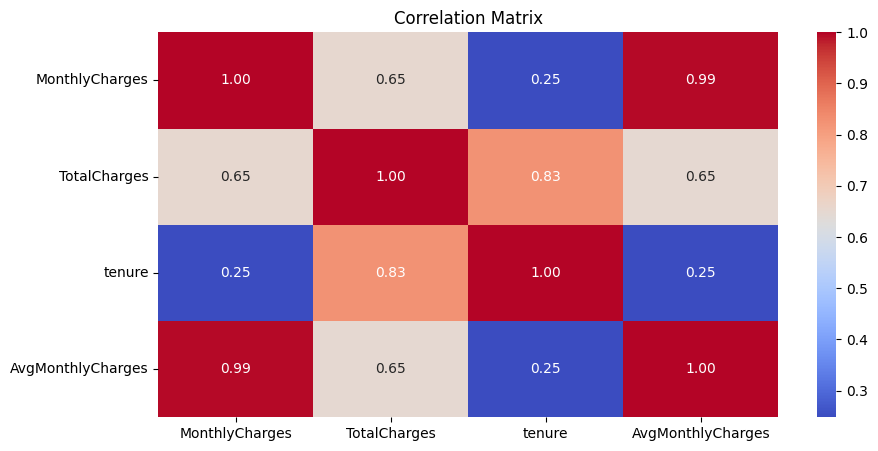

In [36]:
correlation_matrix = df[['MonthlyCharges','TotalCharges','tenure','AvgMonthlyCharges']].corr()
plt.figure(figsize=(10, 5))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [37]:
# The `Churn` column values were replaced, where 'No' was converted to 0 and 'Yes' was converted to 1.
df['Churn'].replace({'No':0, 'Yes':1}, inplace=True)

In [38]:
df.head()

,tenure,MonthlyCharges,TotalCharges,Churn,gender_Male,SeniorCitizen_1,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,...,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,AvgMonthlyCharges
0,1,29.85,29.85,0,False,False,True,False,False,True,...,False,False,False,False,False,True,False,True,False,29.850000
1,34,56.95,1889.50,0,True,False,False,False,True,False,...,False,False,False,True,False,False,False,False,True,55.573529
2,2,53.85,108.15,1,True,False,False,False,True,False,...,False,False,False,False,False,True,False,False,True,54.075000
3,45,42.30,1840.75,0,True,False,False,False,False,True,...,False,False,False,True,False,False,False,False,False,40.905556
4,2,70.70,151.65,1,False,False,False,False,True,False,...,False,False,False,False,False,True,False,True,False,75.825000


# **Model Development**

In [39]:
# Splitting dataset into dependent and independent feature
X = df.drop(columns='Churn').values
y = df['Churn'].values

In [40]:
# Splits the data into training and testing sets with 80% training and 20% testing
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=42,test_size=0.2)

In [41]:
# The features were scaled using `StandardScaler`: The training data (`X_train`) was fitted and transformed. The test data (`X_test`) was transformed using the scaler.
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [42]:
# SMOTE was applied to address class imbalance by oversampling the minority class in the training set.
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_scaled, y_train)

## **Logistic Regression**

In [43]:
Lg = LogisticRegression(random_state=42)
Lg.fit(X_train_resampled, y_train_resampled)
lg_pred = Lg.predict(X_test_scaled)



y_probs = Lg.predict_proba(X_test_scaled)[:, 1]

print('Accuracy score:' , round(accuracy_score(lg_pred, y_test),2))
print("Confusion Matrix:\n", confusion_matrix(y_test, lg_pred))

print("AUC Score:", round(roc_auc_score(y_test, y_probs),2))


print("Classification report :\n" ,classification_report(lg_pred, y_test))

Accuracy score: 0.76
Confusion Matrix:
 [[757 279]
 [ 63 310]]
AUC Score: 0.86
Classification report :
               precision    recall  f1-score   support

           0       0.73      0.92      0.82       820
           1       0.83      0.53      0.64       589

    accuracy                           0.76      1409
   macro avg       0.78      0.72      0.73      1409
weighted avg       0.77      0.76      0.74      1409



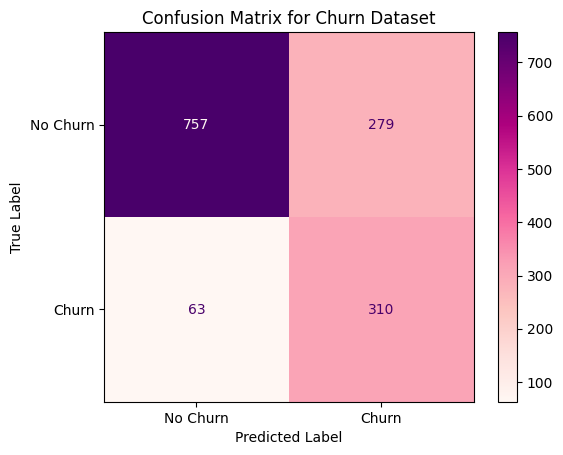

In [44]:
class_names = ['No Churn', 'Churn']
cm = confusion_matrix(y_test,lg_pred)
disp = ConfusionMatrixDisplay(cm,display_labels=class_names)
disp.plot(cmap='RdPu')
plt.title('Confusion Matrix for Churn Dataset')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

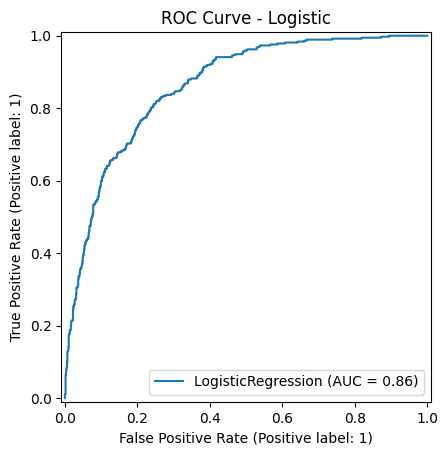

In [45]:
# Plot ROC Curve
RocCurveDisplay.from_estimator(Lg, X_test_scaled, y_test)
plt.title("ROC Curve - Logistic")
plt.show()

## **SVM(Support Vector Machine)**

In [46]:
svm_classifier = SVC(probability=True,random_state=42)
svm_classifier.fit(X_train_resampled, y_train_resampled)
svm_classifier_pred = svm_classifier.predict(X_test_scaled)



y_probs = svm_classifier.predict_proba(X_test_scaled)[:, 1]
print('Accuracy score:' , round(accuracy_score(svm_classifier_pred, y_test),2))

print("Confusion Matrix:\n", confusion_matrix(y_test, svm_classifier_pred))

print("AUC Score:", round(roc_auc_score(y_test, y_probs),2))
print("Classification report :\n" ,classification_report(svm_classifier_pred, y_test))

Accuracy score: 0.77
Confusion Matrix:
 [[804 232]
 [ 97 276]]
AUC Score: 0.84
Classification report :
               precision    recall  f1-score   support

           0       0.78      0.89      0.83       901
           1       0.74      0.54      0.63       508

    accuracy                           0.77      1409
   macro avg       0.76      0.72      0.73      1409
weighted avg       0.76      0.77      0.76      1409



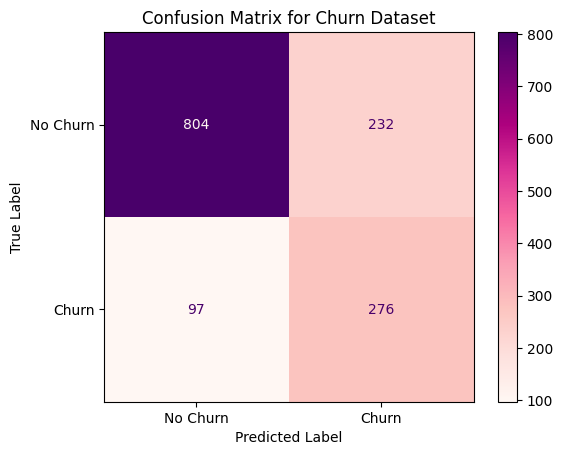

In [47]:
class_names = ['No Churn', 'Churn']
cm = confusion_matrix(y_test,svm_classifier_pred)
disp = ConfusionMatrixDisplay(cm,display_labels=class_names)
disp.plot(cmap='RdPu')
plt.title('Confusion Matrix for Churn Dataset')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

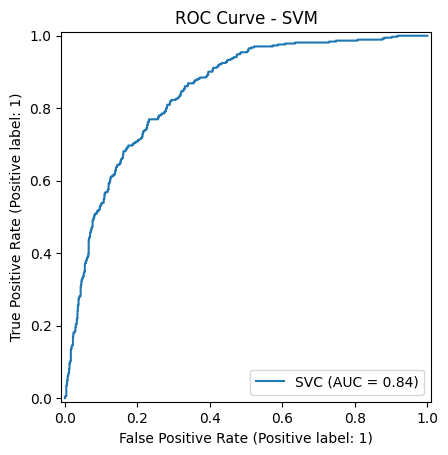

In [48]:
# Plot ROC Curve
RocCurveDisplay.from_estimator(svm_classifier, X_test_scaled, y_test)
plt.title("ROC Curve - SVM")
plt.show()

## **Random Forest**

In [49]:
rf_clf = RandomForestClassifier(random_state=42)
rf_clf.fit(X_train_resampled, y_train_resampled)


y_pred = rf_clf.predict(X_test_scaled)
y_probs = rf_clf.predict_proba(X_test_scaled)[:, 1]

print('Accuracy score:' , round(accuracy_score(y_pred, y_test),2))

print("AUC Score:", round(roc_auc_score(y_test, y_probs),2))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

print("Classification report :\n" ,classification_report(y_pred, y_test))


Accuracy score: 0.79
AUC Score: 0.84
Confusion Matrix:
 [[884 152]
 [137 236]]
Classification report :
               precision    recall  f1-score   support

           0       0.85      0.87      0.86      1021
           1       0.63      0.61      0.62       388

    accuracy                           0.79      1409
   macro avg       0.74      0.74      0.74      1409
weighted avg       0.79      0.79      0.79      1409



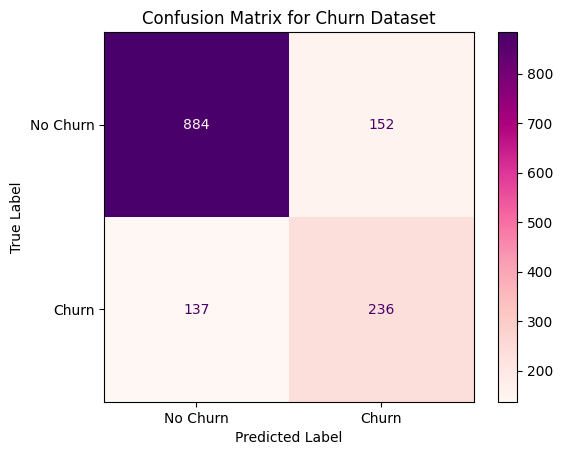

In [50]:
class_names = ['No Churn', 'Churn']
cm = confusion_matrix(y_test,y_pred)
disp = ConfusionMatrixDisplay(cm,display_labels=class_names)
disp.plot(cmap='RdPu')
plt.title('Confusion Matrix for Churn Dataset')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

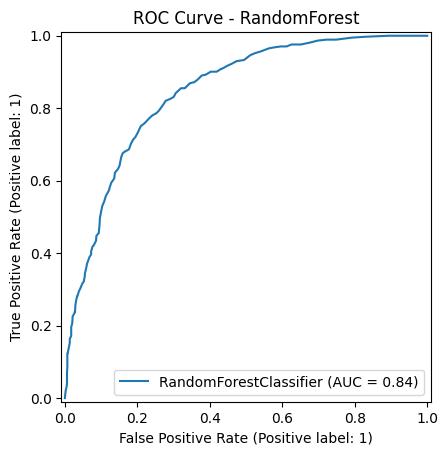

In [51]:
# Plot ROC Curve
RocCurveDisplay.from_estimator(rf_clf, X_test_scaled, y_test)
plt.title("ROC Curve - RandomForest")
plt.show()

## **XG-Boost**

In [53]:
import xgboost as xgb
xgb_clf = xgb.XGBClassifier(
    eval_metric='logloss',
    random_state=42
)


xgb_clf.fit(X_train_resampled, y_train_resampled)


y_pred = xgb_clf.predict(X_test_scaled)

y_probs = xgb_clf.predict_proba(X_test_scaled)[:, 1]

print('Accuracy score:' , round(accuracy_score(y_pred, y_test),2))

print("AUC Score:", round(roc_auc_score(y_test, y_probs),2))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

print("Classification report :\n" ,classification_report(y_pred, y_test))


Accuracy score: 0.8
AUC Score: 0.84
Confusion Matrix:
 [[894 142]
 [145 228]]
Classification report :
               precision    recall  f1-score   support

           0       0.86      0.86      0.86      1039
           1       0.61      0.62      0.61       370

    accuracy                           0.80      1409
   macro avg       0.74      0.74      0.74      1409
weighted avg       0.80      0.80      0.80      1409



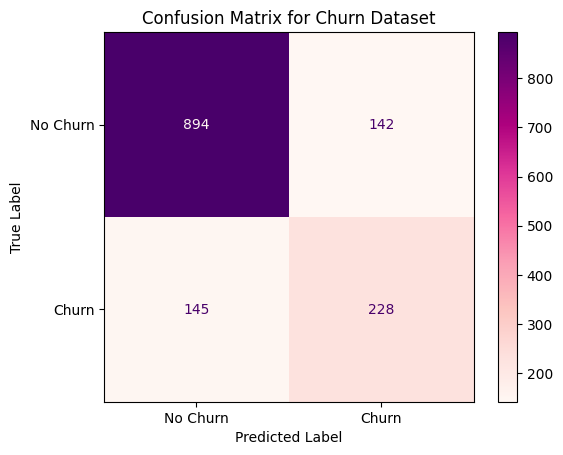

In [54]:
class_names = ['No Churn', 'Churn']
cm = confusion_matrix(y_test,y_pred)
disp = ConfusionMatrixDisplay(cm,display_labels=class_names)
disp.plot(cmap='RdPu')
plt.title('Confusion Matrix for Churn Dataset')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

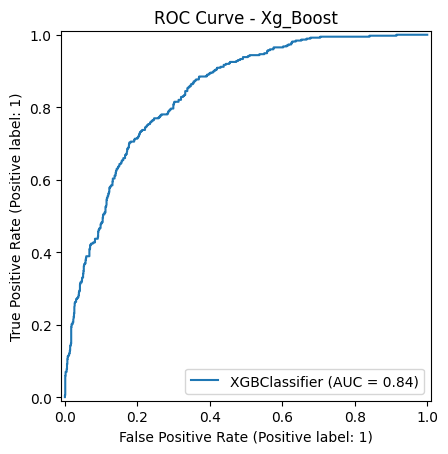

In [55]:
# Plot ROC Curve
RocCurveDisplay.from_estimator(xgb_clf, X_test_scaled, y_test)
plt.title("ROC Curve - Xg_Boost")
plt.show()

## **Gradient Boosting**

In [56]:
gbc = GradientBoostingClassifier()
gbc.fit(X_train_resampled, y_train_resampled)
pred = gbc.predict(X_test_scaled)


y_probs = gbc.predict_proba(X_test_scaled)[:, 1]

print('Accuracy score:' , round(accuracy_score(pred, y_test),2))

print("AUC Score:", round(roc_auc_score(y_test, y_probs),2))
print("Confusion Matrix:\n", confusion_matrix(y_test, pred))

print("Classification report :\n" ,classification_report(pred, y_test))

Accuracy score: 0.79
AUC Score: 0.86
Confusion Matrix:
 [[843 193]
 [104 269]]
Classification report :
               precision    recall  f1-score   support

           0       0.81      0.89      0.85       947
           1       0.72      0.58      0.64       462

    accuracy                           0.79      1409
   macro avg       0.77      0.74      0.75      1409
weighted avg       0.78      0.79      0.78      1409



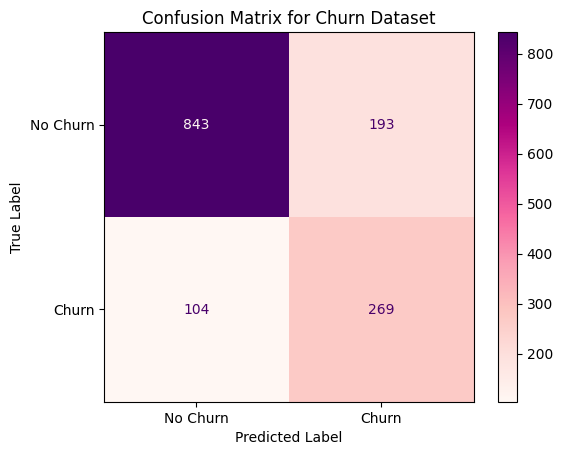

In [57]:
class_names = ['No Churn', 'Churn']
cm = confusion_matrix(y_test,pred)
disp = ConfusionMatrixDisplay(cm,display_labels=class_names)
disp.plot(cmap='RdPu')
plt.title('Confusion Matrix for Churn Dataset')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

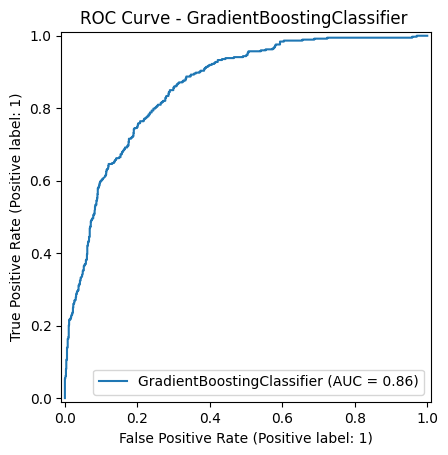

In [58]:
# Plot ROC Curve
RocCurveDisplay.from_estimator(gbc, X_test_scaled, y_test)
plt.title("ROC Curve - GradientBoostingClassifier ")
plt.show()

## **XG boost seems to be the promising model, Performing best amongst all other models, So lets try hyperparameter tuning and see if model performance is improved or not.**

In [59]:
# Using RandomSearchCV
from sklearn.model_selection import RandomizedSearchCV
from xgboost import XGBClassifier

### Explanation of Hyperparameters

- **`n_estimators`**: The number of boosting rounds (trees). A higher value can improve performance but increases training time.
- **`max_depth`**: The maximum depth of a tree. Deeper trees capture more complex patterns but may overfit the data.
- **`learning_rate`**: The step size for each boosting round. Smaller values require more estimators but help prevent overfitting.
- **`subsample`**: The fraction of training data used for each tree. Reduces overfitting by sampling a subset of data (values between 0.6 to 1.0).
- **`colsample_bytree`**: The fraction of features used to build each tree. Helps with regularization and prevents overfitting.
- **`gamma`**: Minimum loss reduction required to make a further partition. Higher values make the algorithm more conservative.
- **`min_child_weight`**: Minimum sum of instance weight in a child. Controls model complexity and helps prevent overfitting.
- **`reg_alpha`**: L1 regularization term (Lasso), used to reduce model complexity and improve sparsity.
- **`reg_lambda`**: L2 regularization term (Ridge), helps prevent overfitting by penalizing large weights.


In [63]:
param_grid = {
    'n_estimators': [100, 200, 300, 500],
    'max_depth': [3, 5, 7, 10, 12],
    'learning_rate': [0.01, 0.05, 0.1, 0.2,0.3],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.7, 0.8, 0.9, 1.0],
    'gamma': [0, 0.1, 0.2, 0.3],
    'min_child_weight': [1, 2, 3, 4],
    'reg_alpha': [0, 0.1, 0.5, 1],
    'reg_lambda': [1, 1.5, 2]
}


xgb_clf_tuned = XGBClassifier(
    random_state=42,
)


random_search = RandomizedSearchCV(
    estimator=xgb_clf_tuned,
    param_distributions=param_grid,
    n_iter=1000,
    cv=5,
    n_jobs=-1,
    scoring='f1',
    verbose=2,
    random_state=42
)


random_search.fit(X_train_resampled, y_train_resampled)


best_xg_clf = random_search.best_estimator_


y_pred_tuned = best_xg_clf.predict(X_test_scaled)
y_probs_tuned = best_xg_clf.predict_proba(X_test_scaled)[:, 1]

print("\nWith Hyperparameter Tuning:")
print("Best Parameters:", random_search.best_params_)
print(classification_report(y_test, y_pred_tuned))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_tuned))
print("AUC Score:", roc_auc_score(y_test, y_probs_tuned))

Fitting 5 folds for each of 1000 candidates, totalling 5000 fits

With Hyperparameter Tuning:
Best Parameters: {'subsample': 1.0, 'reg_lambda': 1, 'reg_alpha': 0.1, 'n_estimators': 500, 'min_child_weight': 1, 'max_depth': 10, 'learning_rate': 0.01, 'gamma': 0.1, 'colsample_bytree': 0.7}
              precision    recall  f1-score   support

           0       0.88      0.85      0.86      1036
           1       0.61      0.68      0.64       373

    accuracy                           0.80      1409
   macro avg       0.75      0.76      0.75      1409
weighted avg       0.81      0.80      0.80      1409

Confusion Matrix:
 [[876 160]
 [120 253]]
AUC Score: 0.8519439585123232


 **Best Parameters:** {'subsample': 1.0, 'reg_lambda': 1, 'reg_alpha': 0.1, 'n_estimators': 500, 'min_child_weight': 1, 'max_depth': 10, 'learning_rate': 0.01, 'gamma': 0.1, 'colsample_bytree': 0.7}

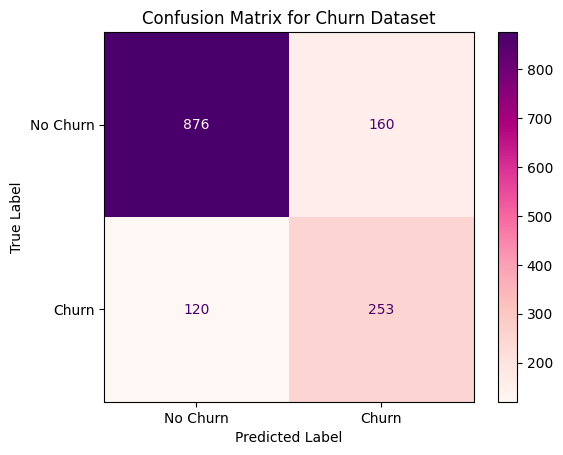

In [66]:
class_names = ['No Churn', 'Churn']
cm = confusion_matrix(y_test,y_pred_tuned)
disp = ConfusionMatrixDisplay(cm,display_labels=class_names)
disp.plot(cmap='RdPu')
plt.title('Confusion Matrix for Churn Dataset')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

- **True Negatives (TN) = 876**: Correctly predicted non-churning customers.

- **False Positives (FP) = 160**: Non-churning customers incorrectly predicted as churning.
- **False Negatives (FN) = 120**: Churning customers incorrectly predicted as non-churning.
- **True Positives (TP) = 253**: Correctly predicted churning customers.

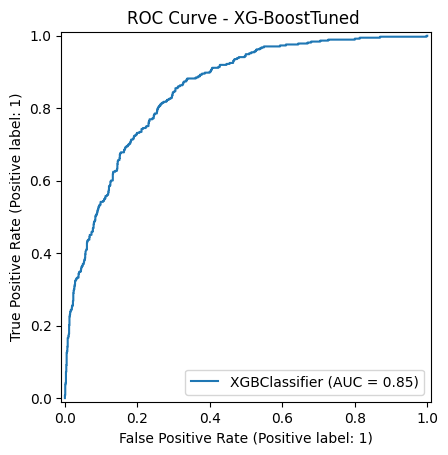

In [68]:
# Plot ROC Curve
RocCurveDisplay.from_estimator(best_xg_clf, X_test_scaled, y_test)
plt.title("ROC Curve - XG-BoostTuned ")
plt.show()

# **Model Evaluation**

# Q7:Compare the performance of all models implemented. Provide a detailed analysis of which model offers the best performance and why, based on the evaluation metrics.

We compare these models using key **evaluation metrics** including **Accuracy**, **Precision**, **Recall**, **F1-Score**, **AUC Score**, and **F1-Macro Average**. These metrics are essential in assessing the model's capabilities and determining which one performs best in predicting customer churn.

## Performance Comparison:

| **Model**                    | **Accuracy** | **Precision (Class 0)** | **Recall (Class 0)** | **F1-Score (Class 0)** | **Precision (Class 1)** | **Recall (Class 1)** | **F1-Score (Class 1)** | **AUC Score** | **F1-Macro Avg** |
|------------------------------|--------------|-------------------------|----------------------|------------------------|-------------------------|----------------------|------------------------|---------------|-------------------|
| **Logistic Regression**       | 0.76         | 0.73                    | 0.92                 | 0.82                   | 0.83                    | 0.53                 | 0.64                   | 0.86          | 0.73              |
| **SVM**                       | 0.77         | 0.78                    | 0.89                 | 0.83                   | 0.74                    | 0.54                 | 0.63                   | 0.84          | 0.73              |
| **Random Forest**             | 0.79         | 0.85                    | 0.87                 | 0.86                   | 0.63                    | 0.61                 | 0.62                   | 0.84          | 0.74              |
| **XGBoost (Before Tuning)**   | 0.80         | 0.86                    | 0.87                 | 0.86                   | 0.61                    | 0.62                 | 0.61                   | 0.84          | 0.74              |
| **XGBoost (After Tuning)**    | 0.80         | 0.88                    | 0.85                 | 0.86                   | 0.61                    | 0.68                 | 0.64                   | 0.85          | 0.75              |
| **Gradient Boosting**         | 0.79         | 0.81                    | 0.89                 | 0.85                   | 0.72                    | 0.58                 | 0.65                   | 0.86          | 0.75              |

## Detailed Analysis:

### 1. **Accuracy:**
- **XGBoost (Before and After Tuning)** and **Gradient Boosting** have the highest **accuracy** of **0.80**, meaning they correctly predict a large portion of churn and non-churn customers.
- **Random Forest** follows closely with **0.79**.
- **SVM** and **Logistic Regression** have slightly lower accuracy at **0.77** and **0.76**, respectively.

### 2. **Precision (Class 0 - Non-churn):**
- **XGBoost (After Tuning)** has the highest **precision** for class 0 (**0.88**), correctly identifying most non-churn customers without misclassifying them.
- **Random Forest** follows with **0.85** precision for class 0.
- **SVM** and **Logistic Regression** show lower precision scores for class 0 at **0.78** and **0.73**, respectively.

### 3. **Recall (Class 0 - Non-churn):**
- **SVM** achieves the highest **recall** for class 0 (**0.89**), showing it’s very effective at identifying non-churn customers.
- **Random Forest** is close with **0.87** recall for class 0.
- **Logistic Regression** has the highest recall (**0.92**) for class 0, but this comes with a tradeoff in precision, meaning it identifies more non-churn customers, some of which may be false positives.

### 4. **F1-Score (Class 0 - Non-churn):**
- **XGBoost (After Tuning)** and **Random Forest** achieve a strong **F1-Score** of **0.86** for class 0, balancing both **precision** and **recall**.
- **SVM** and **Logistic Regression** have lower F1-scores for class 0, at **0.83** and **0.82**, respectively.

### 5. **Precision (Class 1 - Churn):**
- **SVM** has the highest **precision** for class 1 (**0.74**), meaning it’s effective at correctly identifying churn customers among those predicted as churn.
- **Random Forest** comes next with **0.63** for class 1.
- **XGBoost (After Tuning)** and **Gradient Boosting** have **0.61** precision for class 1, meaning they may misclassify more churn customers as non-churn, though this doesn’t significantly affect overall performance.

### 6. **Recall (Class 1 - Churn):**
- **XGBoost (After Tuning)** achieves the highest **recall** for class 1 (**0.68**), successfully identifying churn customers.
- **Gradient Boosting** follows with **0.58** recall, and **Random Forest** has a **0.61** recall for class 1.
- **SVM** and **Logistic Regression** show lower recall for class 1, at **0.54** and **0.53**, respectively, indicating they are less effective at identifying churn customers.

### 7. **F1-Score (Class 1 - Churn):**
- **XGBoost (After Tuning)** reaches the highest **F1-Score** for churn customers (**0.64**), balancing precision and recall effectively.
- **Gradient Boosting** and **Random Forest** have solid F1-scores for churn customers (**0.65** and **0.62**, respectively).
- **SVM** and **Logistic Regression** have lower F1-scores for class 1, at **0.63** and **0.64**, respectively.

### 8. **AUC Score:**
- **Gradient Boosting** and **XGBoost (After Tuning)** both achieve the highest **AUC** score of **0.86**, meaning they are the best at distinguishing between churn and non-churn customers.
- **XGBoost (Before Tuning)** and **Random Forest** follow with **AUC scores** of **0.84**.

### 9. **F1-Macro Average:**
- **XGBoost (After Tuning)** and **Gradient Boosting** have the highest **F1-Macro Average** of **0.75**, showing a good balance between precision and recall across both classes.
- **Random Forest** and **SVM** score **0.74**, while **Logistic Regression** has the lowest F1-Macro Avg at **0.73**.

## Conclusion: Best Performing Model

Based on the evaluation metrics, **XGBoost (After Tuning)** emerges as the **top-performing model** due to:
- The highest **accuracy** (0.80), showing strong overall prediction capability.
- Outstanding **precision** (0.88) and **recall** (0.85) for non-churn customers (class 0), minimizing false positives and false negatives.
- Good **recall** (0.68) and solid **precision** (0.61) for churn customers (class 1), ensuring effective identification of at-risk customers.
- The best **F1-Macro Avg** (0.75), indicating excellent balance across both classes.

**Gradient Boosting** also performs well, especially with its **AUC** score, and **Random Forest** is competitive but slightly lags behind **XGBoost** in a few areas.

In conclusion, **XGBoost (After Tuning)** is the recommended model for predicting customer churn, as it demonstrates the most reliable performance across all evaluation metrics.


# Q8: Discuss the implications of your findings for the company’s retention strategy. How can the insights from your models be used to reduce customer churn?

 This analysis provides insights based on the performance of several models, focusing on **XGBoost**, which has been fine-tuned for optimal results. By interpreting the findings, we can create strategies aimed at reducing churn and improving customer loyalty.

## Implications for Retention Strategy:

### 1. **Targeted Retention Actions:**
The models have helped identify customers who are more likely to churn. With this information, the company can create focused retention actions such as:
- **Exclusive offers and discounts**: Provide at-risk customers with personalized incentives to keep them engaged and reduce the likelihood of them leaving.
- **Special engagement initiatives**: Reach out to these customers with loyalty programs or targeted communication to maintain their interest in the brand.

### 2. **Segmenting Customers Based on Risk:**
By grouping customers according to their risk of churning, the company can apply differentiated strategies:
- **High-risk customers**: This group requires immediate intervention through tailored offers or personalized outreach to address any concerns they may have.
- **Low-risk customers**: While they might be less likely to churn, it is beneficial to maintain their engagement through loyalty programs or other initiatives to ensure they remain satisfied.
- **Medium-risk customers**: These individuals are on the borderline and may require a more subtle intervention, such as surveys to understand their concerns or offering incentives to stay.

### 3. **Proactive Support for At-Risk Customers:**
Instead of waiting for customers to leave, proactive measures can be implemented:
- **Feedback solicitation**: Contact customers identified as at risk and gather feedback on what might influence their decision to stay or leave.
- **Dedicated assistance**: Offer personalized support from account managers or customer service representatives to address issues and improve customer satisfaction.

### 4. **Enhancing the Customer Experience:**
The features identified in the model can be used to improve the customer experience by addressing the specific reasons for churn:
- **Improve service or product offerings**: If the churn data highlights recurring issues with a product or service, the company can address these weaknesses to increase satisfaction.
- **Simplify the customer journey**: Making the interaction process easier, such as streamlining customer service or improving product usability, can reduce frustrations and help retain customers.

### 5. **Loyalty and Rewards Programs:**
Customers who are identified as likely to churn but who have high value to the company can be retained through loyalty programs:
- **Rewards for engagement**: Create exclusive loyalty programs that reward long-term customers with benefits, making them feel valued and incentivizing them to stay.
- **Milestone-based rewards**: Offering rewards when customers reach certain spending or engagement milestones can foster continued loyalty.

### 6. **Flexible Pricing and Payment Options:**
If certain customer segments show higher churn due to pricing concerns, the company can adapt its pricing strategy:
- **Discounts for loyal customers**: Offering long-term customers discounts or flexible payment options might help mitigate churn.
- **Subscription or bundle deals**: Introducing subscription models or bundling products at a competitive price could encourage customers to stay longer.



# **END OF CODING BOOK**